# Project 1a
### Prepared By: Sujit Khatiwada (C0835126) Group H

# 1. Import an XML file using python

In [1]:
#Using tree method of retreival
import xml.etree.ElementTree as ET

In [2]:
# We are using a sample test.xml file for retrieval
tree = ET.parse("test.xml")
tree

In [3]:
root = tree.getroot()
# reaching root

In [4]:
# Iterating through the child element of XML file
for child in root:
  print({x.tag for x in root.findall(child.tag+"/*")})

{'genre', 'publish_date', 'price', 'author', 'description', 'title'}
{'genre', 'publish_date', 'price', 'author', 'description', 'title'}
{'genre', 'publish_date', 'price', 'author', 'description', 'title'}
{'genre', 'publish_date', 'price', 'author', 'description', 'title'}
{'genre', 'publish_date', 'price', 'author', 'description', 'title'}
{'genre', 'publish_date', 'price', 'author', 'description', 'title'}
{'genre', 'publish_date', 'price', 'author', 'description', 'title'}
{'genre', 'publish_date', 'price', 'author', 'description', 'title'}
{'genre', 'publish_date', 'price', 'author', 'description', 'title'}
{'genre', 'publish_date', 'price', 'author', 'description', 'title'}
{'genre', 'publish_date', 'price', 'author', 'description', 'title'}
{'genre', 'publish_date', 'price', 'author', 'description', 'title'}


In [5]:
#Getting first book 
book1 = root[0]
book1

<Element 'book' at 0x0000015968B27AE0>

In [6]:
#getting the Id of first book
book1.attrib['id']

'bk101'

In [7]:
# Gatherning the nodes on one book
for child in book1:
    print(child.tag, child.attrib)

author {}
title {}
genre {}
price {}
publish_date {}
description {}


In [18]:
# Let us see the nodes as a dataframe by using pandas
import pandas as pd
rows = []
columns = ["author", "title", "genre", "price", "publish_date","description"]
for node in root: 
    res = []
    for el in columns[0:]: 
        if node is not None and node.find(el) is not None:
            res.append(node.find(el).text)
        else: 
            res.append(None)
    rows.append({columns[i]: res[i] 
                    for i, _ in enumerate(columns)})
dataframe = pd.DataFrame(rows, columns=columns)
dataframe

,author,title,genre,price,publish_date,description
0,"Gambardella, Matthew",XML Developer's Guide,Computer,44.95,2000-10-01,An in-depth look at creating applications \n ...
1,"Ralls, Kim",Midnight Rain,Fantasy,5.95,2000-12-16,"A former architect battles corporate zombies, ..."
2,"Corets, Eva",Maeve Ascendant,Fantasy,5.95,2000-11-17,After the collapse of a nanotechnology \n ...
3,"Corets, Eva",Oberon's Legacy,Fantasy,5.95,2001-03-10,"In post-apocalypse England, the mysterious \n ..."
4,"Corets, Eva",The Sundered Grail,Fantasy,5.95,2001-09-10,"The two daughters of Maeve, half-sisters, \n ..."
5,"Randall, Cynthia",Lover Birds,Romance,4.95,2000-09-02,When Carla meets Paul at an ornithology \n ...
6,"Thurman, Paula",Splish Splash,Romance,4.95,2000-11-02,A deep sea diver finds true love twenty \n ...
7,"Knorr, Stefan",Creepy Crawlies,Horror,4.95,2000-12-06,"An anthology of horror stories about roaches,\..."
8,"Kress, Peter",Paradox Lost,Science Fiction,6.95,2000-11-02,After an inadvertant trip through a Heisenberg...
9,"O'Brien, Tim",Microsoft .NET: The Programming Bible,Computer,36.95,2000-12-09,Microsoft's .NET initiative is explored in \n ...


# 2. Import a JSON file and analyze different parts of JSON file

In [2]:
import json # Import JSON for JSON parse

In [3]:
with open('sample4.json') as file:
    data = json.load(file) #Loading file
    #creates and returns a new Python dictionary with the key-value pairs in the JSON file.

In [4]:
data
#Checking the data information from json file

{'people': [{'firstName': 'Joe',
   'lastName': 'Jackson',
   'gender': 'male',
   'age': 28,
   'number': '7349282382'},
  {'firstName': 'James',
   'lastName': 'Smith',
   'gender': 'male',
   'age': 32,
   'number': '5678568567'},
  {'firstName': 'Emily',
   'lastName': 'Jones',
   'gender': 'female',
   'age': 24,
   'number': '456754675'}]}

In [5]:
print(data["people"])

[{'firstName': 'Joe', 'lastName': 'Jackson', 'gender': 'male', 'age': 28, 'number': '7349282382'}, {'firstName': 'James', 'lastName': 'Smith', 'gender': 'male', 'age': 32, 'number': '5678568567'}, {'firstName': 'Emily', 'lastName': 'Jones', 'gender': 'female', 'age': 24, 'number': '456754675'}]


In [6]:
print(len(data["people"]))
#The output is 3 because the value of the main key "people" is a list with three elements.

3


In [7]:
#We can also use the keys to access their corresponding values. This is what we typically do when we work with JSON files.
#For example, to access the phone number of the first person, we would write:
data["people"][0]["number"]

'7349282382'

In [8]:
import pandas as pd
df = pd.json_normalize(data["people"])
df

,firstName,lastName,gender,age,number
0,Joe,Jackson,male,28,7349282382
1,James,Smith,male,32,5678568567
2,Emily,Jones,female,24,456754675


# 3. Import the breast cancer dataset and store it in a JSON file

In [23]:
import sklearn.datasets
import pandas as pd
data = sklearn.datasets.load_breast_cancer()

In [20]:
# load Sklearm datasets to pandas dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [21]:
df['target'] =data.target
# attaching target variable

In [24]:
# JSON Storage
df.to_json('./cancer_data.json', orient='index')

# 4. Make a regression dataset and store them on disk in a csv file

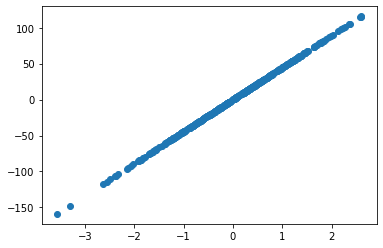

In [25]:
from sklearn.datasets import make_regression
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=500, n_features=1, noise=0)
# plot regression dataset
pyplot.scatter(X,y)
pyplot.show()

In [26]:
#Creating a regression for 500 sample wth 7 features and 4 informative
X, y = make_regression(n_samples=500, n_features=7, n_informative=4)

In [27]:
import csv

header = y
data = X

with open('sample_regression.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(data)